Epoch 1: 6393.501329553183 rate : 1
Epoch 2: 6142.82533871848 rate : 250.67599083470213
Epoch 3: 5958.638177878341 rate : 184.18716084013977
Epoch 4: 5818.438078519195 rate : 140.2000993591455
Epoch 5: 5711.707643361607 rate : 106.73043515758854
Epoch 6: 5630.44627914692 rate : 81.26136421468709
Epoch 7: 5568.563414327623 rate : 61.88286481929663
Epoch 8: 5521.419882790934 rate : 47.1435315366889
Epoch 9: 5485.5048810342905 rate : 35.915001756643505
Epoch 10: 5458.14213084438 rate : 27.362750189910912
Epoch 11: 5437.280036741102 rate : 20.86209410327774
Epoch 12: 5421.369890774363 rate : 15.910145966739037
Epoch 13: 5409.226579730417 rate : 12.143311043945687
Epoch 14: 5399.9579747468415 rate : 9.268604983575642
Epoch 15: 5392.884781051928 rate : 7.073193694913243
Epoch 16: 5387.474669102868 rate : 5.4101119490605925
Epoch 17: 5383.338414395321 rate : 4.136254707546868
Epoch 18: 5380.175563359345 rate : 3.1628510359760185
Epoch 19: 5377.752172915034 rate : 2.423390444310826
Epoch 20: 5

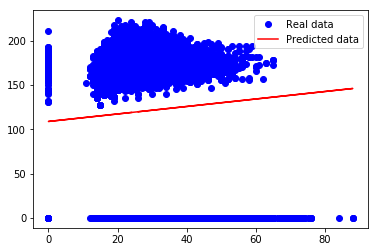

In [39]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd


DATA_FILE = 'C:/Users/ASUS/Desktop/stanford-tensorflow-tutorials-master/stanford-tensorflow-tutorials-master/2017/examples/data/athlete_events_2.xlsx'

# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)

n_train = 2
rate = 0.1
cur_epoch = 1
n_epoch = 1
total_rate = 1

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
	
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
    while n_epoch < n_train: # train the model 100 epochs
        total_loss = 0
        for x, y in data:
        # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
            
        if n_epoch == 1 :
            cur_epoch = total_loss/n_samples
            n_train += 1
        else :
            total_rate = cur_epoch -  total_loss/n_samples
            if total_rate > rate:
                n_train +=1
                
            cur_epoch = total_loss/n_samples
            
        print('Epoch {0}: {1} rate : {2}'.format(n_epoch, total_loss/n_samples,total_rate))
        n_epoch += 1
    # close the writer when you're done using it
    writer.close() 
	
    # Step 9: output the values of w and b
    w, b = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()